## Imports

In [2]:
# Your code here
import numpy as np
import matplotlib.pyplot as plt
import time
from numba import njit

## Numba accelerator

In [11]:
@njit(fastmath=True)
def solve_1d_nonlinearconv(u, un, nt, nx, dt, dx):
    
    # Your code here
    for n in range(nt):  
        for i in range(nx): un[i] = u[i]
        for i in range(1, nx): 
            u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1])
    return 0

## Inputs

In [4]:
nx = 201  # try changing this number from 41 to 81 and Run All ... what happens?
dx = 2 / (nx-1)
nt = 500    #nt is the number of timesteps we want to calculate
dt = 0.001
grid = np.linspace(0,2,nx) # creating the space grid    

### Initialisation

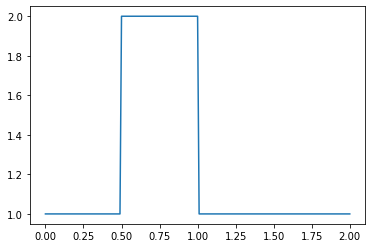

In [5]:
u0 = np.ones(nx)      #numpy function ones()
u0[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
plt.plot(grid,u0)
u = u0.copy()
un = np.ones(nx)

### Call the function to solve the non linear equation

In [6]:
# YOur code here
solve_1d_nonlinearconv(u, un, nt, nx, dt, dx)

0

### Plotting data
- Expected output:
![nonlinear](../data/Nonlinear.png)

Text(0.5, 1.0, '1D Non Linear Convection')

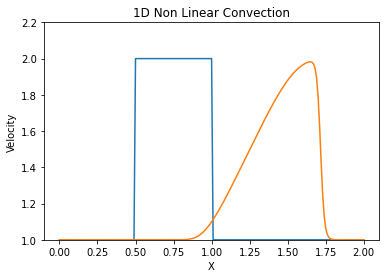

In [8]:
# Your code here
#Plotting data
plt.plot(grid,u0)
plt.plot(grid,u);
plt.ylim([1.,2.2])
plt.xlabel('X')
plt.ylabel('Velocity')    
plt.title('1D Non Linear Convection')

## Call Funtions using timeit 

### Pure function

In [12]:
# Your code here
%timeit solve_1d_nonlinearconv.py_func(u, un, nt, nx, dt, dx)

111 ms ± 8.67 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Function with numba accelerator

In [13]:
# Your code here
%timeit solve_1d_nonlinearconv(u, un, nt, nx, dt, dx)

758 µs ± 110 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
